In [1]:
from google.colab import drive, output
drive.mount('/content/drive')
import sys
!pip install torchaudio
!pip install wandb --upgrade
!wandb login
output.clear()

In [2]:
%load_ext autoreload
%autoreload 1
%cd '/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project'
#sys.path.append('/content/drive/MyDrive/Deep Learning/AutoEncoders/Project/VQVAE_Working/data')
#sys.path.append('/content/drive/MyDrive/Deep Learning/AutoEncoders/Project/VQVAE_Working/models')
sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Dataloader')
sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Models')
sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Modules')

/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project


In [3]:
# from __future__ import print_function
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

from six.moves import xrange

import datetime
import gc

from scipy import signal

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import torchaudio.transforms as audio_transform

#from ResidualStack import ResidualStack
#from Residual import Residual

from Jaguas_DataLoader import SoundscapeData
from Models import ConvAE as AE
from AE_training_functions import TestModel, TrainModel
from AE_Clustering import AE_Clustering 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = xm.xla_device()
print(device)

from datetime import timedelta
import wandb
from wandb import AlertLevel
wandb.login()

cuda


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: danielnieto. Use `wandb login --relogin` to force relogin


True

In [4]:
root_path = '/content/drive/Shareddrives/ConservacionBiologicaIA/Datos/Jaguas_2018'


dataset = SoundscapeData(root_path, audio_length=12, ext="wav", win_length=1028)
dataset_train, dataset_test = random_split(dataset,
                                           [round(len(dataset)*0.5), len(dataset) - round(len(dataset)*0.5)], 
                                           generator=torch.Generator().manual_seed(1024))

config = {
    "project" : "AE-Jaguas",
    "audio_length": dataset.audio_length,
    "batch_size" : 8,
    "num_epochs": 6,
    "num_hiddens" : 64,
    "gamma_lr" : 0.1,
    "learning_rate" : 1e-2,
    "dataset" : "Audios Jaguas",
    "architecture": "AE",
    "win_length" : dataset.win_length
}
torch.save(dataset_test, "dataset_test_ae")

training_loader = DataLoader(dataset_train, batch_size=config["batch_size"])
test_loader = DataLoader(dataset_test, batch_size=config["batch_size"])


model = AE(num_hiddens=config["num_hiddens"]).to(device)

optimizer = optim.Adam(model.parameters(), lr=config["learning_rate"], amsgrad=False)
scheduler = lr_scheduler.StepLR(optimizer, step_size = 2, gamma = config["gamma_lr"] )

config["optimizer"] = optimizer
config["scheduler"] = scheduler
config["num_training_updates"] = len(training_loader)

wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


encoder_shape:  torch.Size([32, 64, 9, 9])
decoder_shape:  torch.Size([32, 1, 515, 515])
epoch: 1 of 6 	 iteration: 1 of 1255 	 loss: 0.5135
encoder_shape:  torch.Size([32, 64, 9, 9])
decoder_shape:  torch.Size([32, 1, 515, 515])
epoch: 1 of 6 	 iteration: 2 of 1255 	 loss: 0.3484
encoder_shape:  torch.Size([32, 64, 9, 9])
decoder_shape:  torch.Size([32, 1, 515, 515])
epoch: 1 of 6 	 iteration: 3 of 1255 	 loss: 0.352
encoder_shape:  torch.Size([32, 64, 9, 9])
decoder_shape:  torch.Size([32, 1, 515, 515])
epoch: 1 of 6 	 iteration: 4 of 1255 	 loss: 0.596
cuda


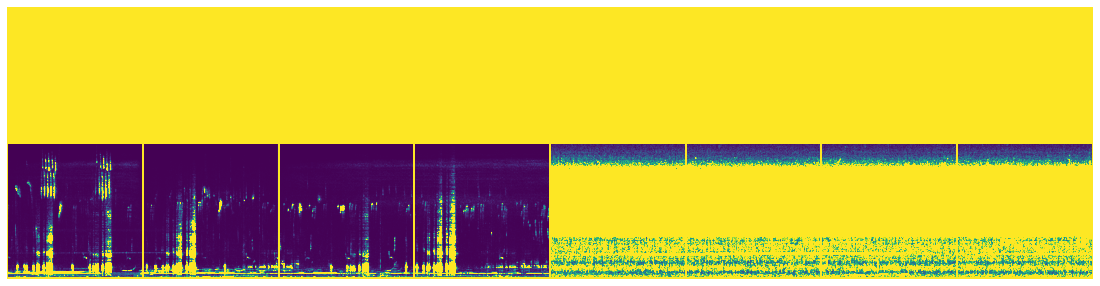

encoder_shape:  torch.Size([32, 64, 9, 9])
decoder_shape:  torch.Size([32, 1, 515, 515])
epoch: 1 of 6 	 iteration: 5 of 1255 	 loss: 0.2981
encoder_shape:  torch.Size([32, 64, 9, 9])
decoder_shape:  torch.Size([32, 1, 515, 515])
epoch: 1 of 6 	 iteration: 6 of 1255 	 loss: 0.2025
encoder_shape:  torch.Size([32, 64, 9, 9])
decoder_shape:  torch.Size([32, 1, 515, 515])
epoch: 1 of 6 	 iteration: 7 of 1255 	 loss: 0.1774
encoder_shape:  torch.Size([32, 64, 9, 9])
decoder_shape:  torch.Size([32, 1, 515, 515])
epoch: 1 of 6 	 iteration: 8 of 1255 	 loss: 0.1638
cuda


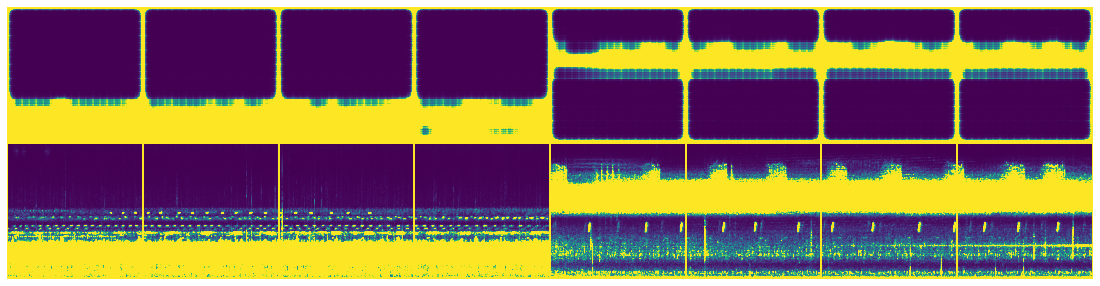

encoder_shape:  torch.Size([32, 64, 9, 9])
decoder_shape:  torch.Size([32, 1, 515, 515])
epoch: 1 of 6 	 iteration: 9 of 1255 	 loss: 0.1927
encoder_shape:  torch.Size([32, 64, 9, 9])
decoder_shape:  torch.Size([32, 1, 515, 515])
epoch: 1 of 6 	 iteration: 10 of 1255 	 loss: 0.1962
encoder_shape:  torch.Size([32, 64, 9, 9])
decoder_shape:  torch.Size([32, 1, 515, 515])
epoch: 1 of 6 	 iteration: 11 of 1255 	 loss: 0.4462
encoder_shape:  torch.Size([32, 64, 9, 9])
decoder_shape:  torch.Size([32, 1, 515, 515])
epoch: 1 of 6 	 iteration: 12 of 1255 	 loss: 0.2369
cuda


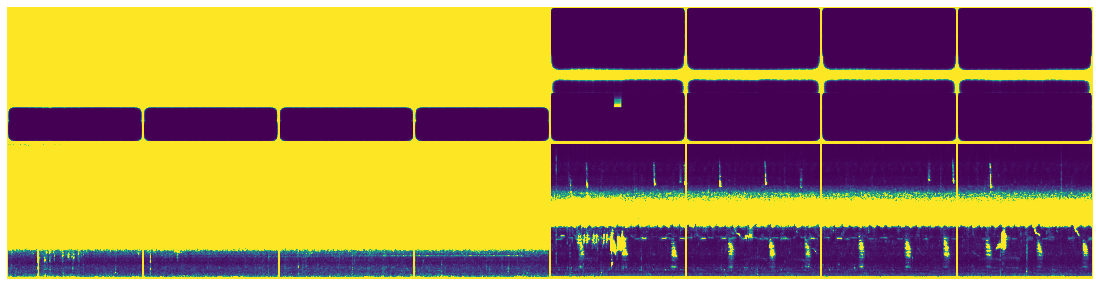

encoder_shape:  torch.Size([32, 64, 9, 9])
decoder_shape:  torch.Size([32, 1, 515, 515])
epoch: 1 of 6 	 iteration: 13 of 1255 	 loss: 0.1991


KeyboardInterrupt: ignored

Error in callback <function _WandbInit._pause_backend at 0x7f2981033b90> (for post_run_cell):


KeyboardInterrupt: ignored

In [5]:
Training = TrainModel(model)
model, logs, run_name = Training.fordward(training_loader, test_loader, config)
time = datetime.datetime.now()
torch.save(model.state_dict(),f'{run_name}_{time.day}_{time.hour}.pkl')
torch.save(config,f'config_{run_name}_{time.day}_{time.hour}.pth')

In [6]:
model.load_state_dict(torch.load(f'Models/AE_audio_length_12_win_length_1028_batch_size 8_epoch_6_23_55.pkl', map_location=torch.device('cpu')))

<All keys matched successfully>

In [7]:
root_path = '/content/drive/Shareddrives/ConservacionBiologicaIA/Datos/Porce_2019'


dataset = SoundscapeData(root_path, audio_length=12, ext="WAV", win_length=1028)
dataset_train, dataset_test = random_split(dataset,
                                           [round(len(dataset)*0.7), len(dataset) - round(len(dataset)*0.7)], 
                                           generator=torch.Generator().manual_seed(1024))
Dataset_train = DataLoader(dataset_train, batch_size=54, shuffle=True)
Dataset = DataLoader(dataset_test, batch_size=54, shuffle=True)

training_loader = DataLoader(dataset_train, batch_size=config["batch_size"])
test_loader = DataLoader(dataset_test, batch_size=config["batch_size"])
iterator = iter(test_loader)
testing = TestModel(model, iterator, device=torch.device("cuda"))


cuda


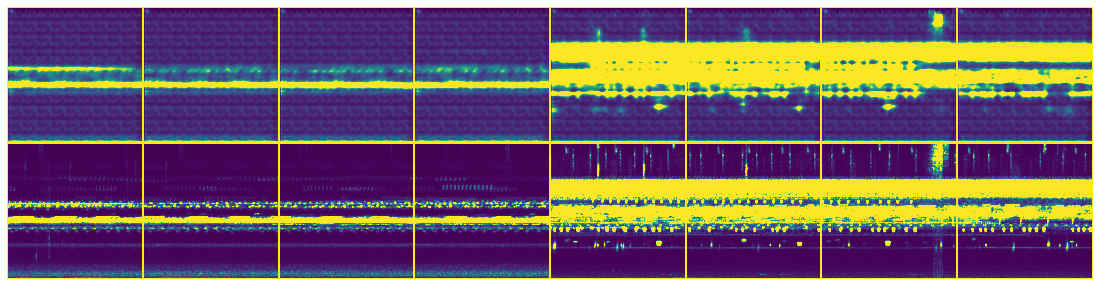

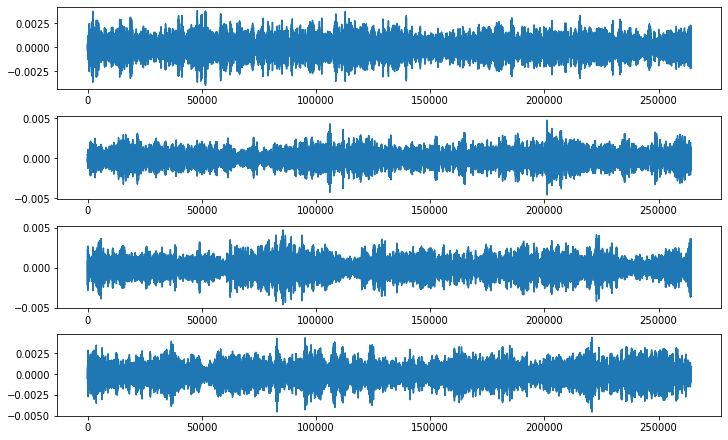

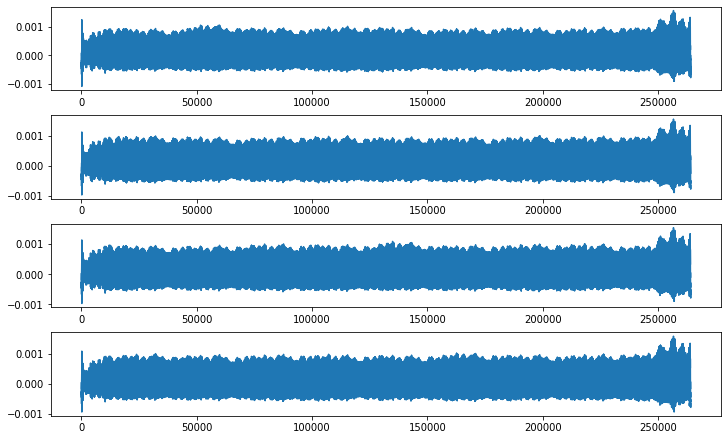

In [8]:
originals, reconstructions, encodings, label, loss= testing.run()

[[[ 1.04367986e-04  1.02619207e-04 -5.08993236e-05 ...  1.56956269e-04
    2.18433387e-04  1.43055351e-05]]]
[[[-0.03655198 -0.03657391 -0.03849845 ... -0.03589272 -0.03512203
   -0.03768103]]]


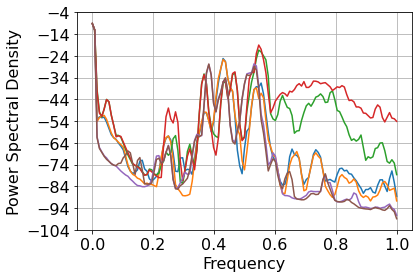

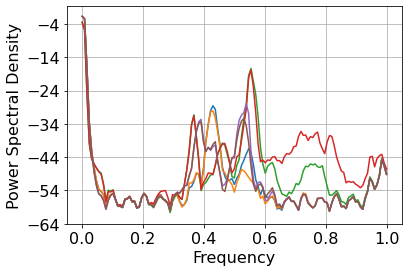

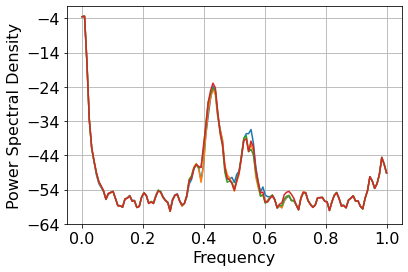

In [9]:
wav_origin=testing.waveform_generator(spec=originals)
print(wav_origin[0:1])
wav_origin = np.interp(wav_origin, (wav_origin.min(), wav_origin.max()), (-1, +1))
print(wav_origin[0:1])
wav_recons=testing.waveform_generator(spec=reconstructions)
wav_recons= np.interp(wav_recons, (wav_recons.min(), wav_recons.max()), (-1, +1))
testing.plot_psd(wav_origin[0:4],2)
testing.plot_psd(wav_origin[10:14],2)
testing.plot_psd(wav_origin[18:22],2)
plt.savefig("original_psd.pdf")
plt.figure()
testing.plot_psd(wav_recons[0:4],2)
testing.plot_psd(wav_recons[10:14],2)
testing.plot_psd(wav_recons[18:22],2)
plt.savefig("recon_psd.pdf")
wav_diff = wav_origin-wav_recons
plt.figure()
testing.plot_psd(wav_diff,4)

[[[ 1.04367986e-04  1.02619207e-04 -5.08993236e-05 ...  1.56956269e-04
    2.18433387e-04  1.43055351e-05]]]
[[[-0.03655198 -0.03657391 -0.03849845 ... -0.03589272 -0.03512203
   -0.03768103]]]


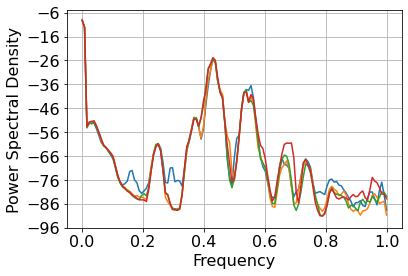

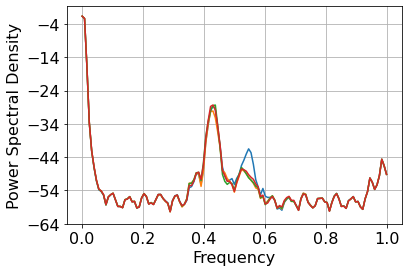

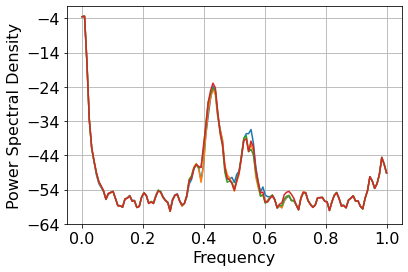

In [10]:
wav_origin=testing.waveform_generator(spec=originals)
print(wav_origin[0:1])
wav_origin = np.interp(wav_origin, (wav_origin.min(), wav_origin.max()), (-1, +1))
print(wav_origin[0:1])
wav_recons=testing.waveform_generator(spec=reconstructions)
wav_recons= np.interp(wav_recons, (wav_recons.min(), wav_recons.max()), (-1, +1))
testing.plot_psd(wav_origin,4)
plt.savefig("original_psd.pdf")
plt.figure()
testing.plot_psd(wav_recons,4)
plt.savefig("recon_psd.pdf")
wav_diff = wav_origin-wav_recons
plt.figure()
testing.plot_psd(wav_diff,4)


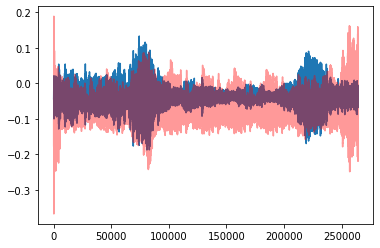

In [11]:
plt.plot(wav_origin[11,0])
plt.plot(wav_recons[11,0], color='red', alpha = 0.4)

cuda
(216, 2)


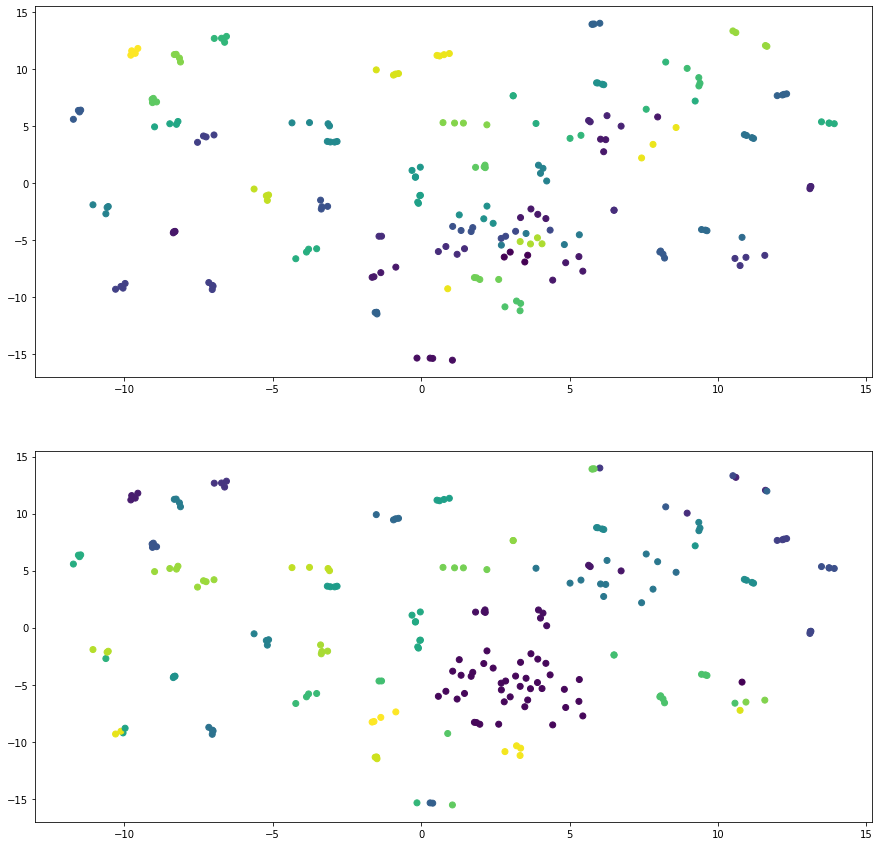

cuda
(216, 2)


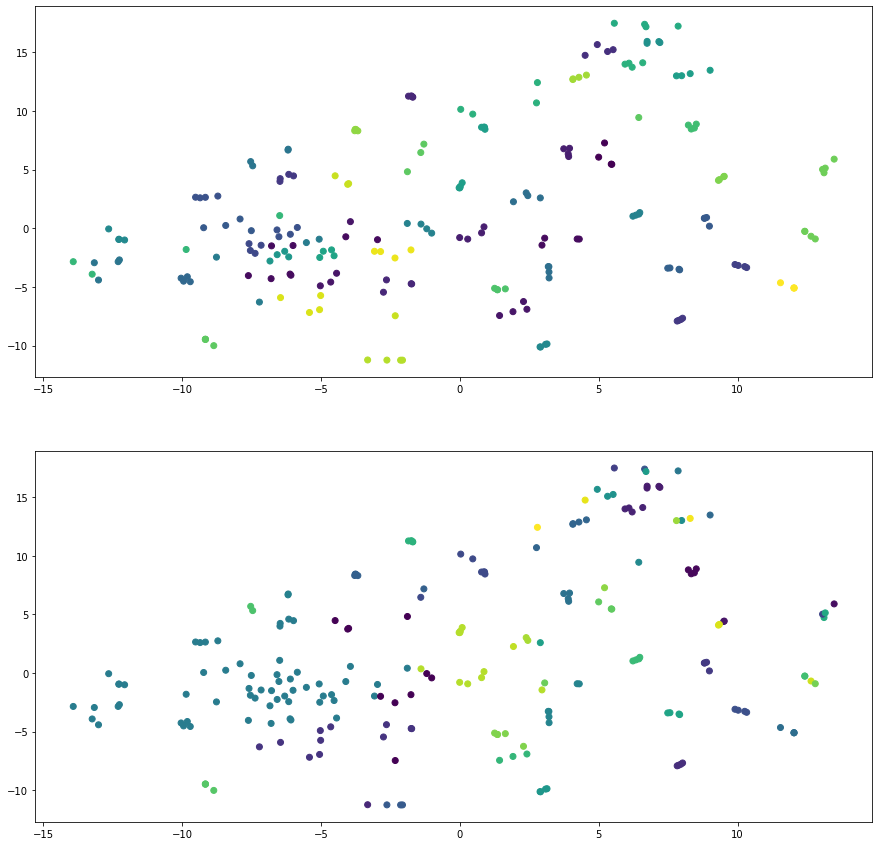

In [ ]:
iterator_Dataset = iter(Dataset)
testing = TestModel(model, iterator_Dataset, device=torch.device("cuda"))
Clustering = AE_Clustering(testing, Dataset, 54)
kmeans = Clustering.fordward()

In [ ]:
Clustering.plot_centroids()

In [ ]:
encodings_size = [64,9,9]
plt.figure(figsize=(18, 18))
model.to("cpu")
for i, spec in enumerate(kmeans.cluster_centers_):
    encodings = spec.reshape(encodings_size)
    encodings = torch.tensor(encodings).float()
    decodings = model.decoder(encodings).detach().numpy()
    plt.subplot(9, 9, i + 1)
    plt.imshow(decodings[0,:,:], cmap="inferno", interpolation="nearest",vmin=0, vmax=0.02)
    plt.xticks(())
    plt.yticks(())


In [ ]:
from scipy.io.wavfile import write

class TestModel:

    def __init__(self, model, iterator, num_views):
        self._model = model
        self._iterator = iterator
        self.num_views = num_views
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def save_waveform(self, waveform, directory=None):
        scaled = np.int16(waveform[0,0]/np.max(np.abs(waveform[0,0])) * 32767)
        write(directory + '.wav', 22050, scaled)

    def plot_waveform(self, waveform, n_rows=4):
        fig, axs = plt.subplots(n_rows, figsize=(10, 6), constrained_layout=True)
        for i in range(n_rows):
            axs[i].plot(waveform[i,0])               
        plt.show()
        
        
    def waveform_generator(self, spec, n_fft=1028, win_length=1028, audio_length=12, base_win=256):
        spec = spec.cdouble()
        spec = spec.to("cpu")
        # hop_length = int(np.round(base_win/win_length * 172.3))
        transformation = audio_transform.InverseSpectrogram(n_fft=n_fft, win_length=win_length)
        waveform = transformation(spec)
        waveform = waveform.cpu().detach().numpy()
        return waveform
    
    def plot_psd(self, waveform, n_wavs=1):
        for i in range(n_wavs):
            plt.psd(waveform[i][0])
            plt.xlabel("Frequency", fontsize=16)
            plt.ylabel("Power Spectral Density", fontsize=16)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)



    def plot_reconstructions(self, imgs_original, imgs_reconstruction, num_views:int = 8):
        output = torch.cat((imgs_original[0:self.num_views], imgs_reconstruction[0:self.num_views]), 0)
        img_grid = make_grid(output, nrow=self.num_views, pad_value=20)
        fig, ax = plt.subplots(figsize=(20,5))
        ax.imshow(img_grid[1,:,:].cpu(), vmin=0, vmax=0.02, origin = "lower")
        ax.axis("off")
        plt.show()
        return fig

    def reconstruct(self):
        self._model.eval()
        (valid_originals, _, label) = next(self._iterator)
        valid_originals = torch.reshape(valid_originals, (valid_originals.shape[0] * valid_originals.shape[1], 
                                                    valid_originals.shape[2], valid_originals.shape[3]))
        valid_originals = torch.unsqueeze(valid_originals,1)

        valid_originals = valid_originals.to(self.device)

        valid_encodings = self._model.encoder(valid_originals)

        valid_reconstructions = self._model.decoder(valid_encodings)

        valid_originals_nonorm = torch.expm1(valid_originals)
        valid_reconstructions_nonorm = torch.expm1(valid_reconstructions)

        BCE = F.mse_loss(valid_reconstructions, valid_originals)
        loss = BCE

        return valid_originals, valid_reconstructions, valid_encodings, label, loss

    def run(self, plot=True, wave_return=True, wave_plot=True, directory=None):
        wave_original = []
        wave_reconstruction = []
        originals, reconstructions, encodings, label, error = self.reconstruct() 
        if plot:
            self.plot_reconstructions(originals, reconstructions)
        if wave_return:
            wave_original = self.waveform_generator(originals)
            wave_reconstruction = self.waveform_generator(reconstructions)
            if wave_plot:
                self.plot_waveform(wave_original, n_rows=4)
                self.plot_waveform(wave_reconstruction, n_rows=4)
            if directory != None:
                dir_ori = directory+"original_"
                dir_recon = directory+"reconstruction_"
                self.save_waveform(wave_original, dir_ori)
                self.save_waveform(wave_reconsctruction, dir_recon)

        return originals, reconstructions, encodings, label, error


class TrainModel:

    def __init__(self, model):
        self._model = model
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def wandb_init(self, config, keys=["audio_length", "win_length", "batch_size"]):
        try:
            run_name = "AE_"
            for key in keys:
                if key in config.keys():
                    run_name = run_name + key + ":" + str(config[key]) + "_"
                else:
                    run_name = run_name + str(key)

            wandb.login()
            wandb.finish()
            wandb.init(project="AE-Jaguas", config=config)
            wandb.run.name = run_name
            wandb.run.save()
            wandb.watch(self._model, F.mse_loss, log="all", log_freq=1)
            is_wandb_enable = True         
        except Exception as e:
            print(e)
            is_wandb_enable = False

        return is_wandb_enable, run_name

    def wandb_logging(self, dict):
        for keys in dict:
            wandb.log({keys: dict[keys]})


    def fordward(self, training_loader, test_loader, config):
        iterator = iter(test_loader)
        wandb_enable, run_name = self.wandb_init(config)
        optimizer = config["optimizer"]
        scheduler = config["scheduler"]

        train_res_recon_error = []
        train_res_perplexity = []
        logs = []
        best_loss = 10000

        for epoch in range(config["num_epochs"]):
            iterator_train = iter(training_loader)
            for i in xrange(config["num_training_updates"]):
                self._model.train()
                try:
                    (data, _,_) = next(iterator_train)
                except Exception as e:
                    print("error")
                    print(e)
                    logs.append(e)
                    continue

                data = torch.reshape(data, (data.shape[0] * data.shape[1], data.shape[2], data.shape[3]))
                data = torch.unsqueeze(data,1)
                data = data.to(self.device)

                optimizer.zero_grad()
                data_recon = self._model(data)

                loss = F.mse_loss(data_recon, data)
                loss.backward()

                optimizer.step()
                print(f'epoch: {epoch+1} of {config["num_epochs"]} \t iteration: {(i+1)} of {config["num_training_updates"]} \t loss: {np.round(loss.item(),4)}')
                dict = {"loss":loss.item()}
                self.wandb_logging(dict)
                                
                
                if (i+1) % 50 == 0:
                    try:
                        test_ = TestModel(self._model, iterator, 8)
                        #torch.save(model.state_dict(),f'model_{epoch}_{i}.pkl')
                        originals, reconstructions, encodings, labels, test_error = test_.reconstruct()
                        fig = test_.plot_reconstructions(originals, reconstructions, 8)
                        images = wandb.Image(fig, caption= f"recon_error: {np.round(test_error.item(),4)}")
                        self.wandb_logging({"examples": images, "step": i+1//50})
                        
                    except Exception as e:
                        print("error")
                        logs.append(e)
                        continue
                else:
                    pass

                if loss < 0.05:
                    wandb.alert(
                    title='High accuracy',
                    text=f'Recon error {loss} is lower than 0.05',
                    level=AlertLevel.WARN,
                    wait_duration=timedelta(minutes=5)
                                )        
                    torch.save(self._model.state_dict(),f'{run_name}_low_error.pkl')
                else:
                    pass
            
            scheduler.step()
            torch.cuda.empty_cache()
            time = datetime.datetime.now()
            torch.save(self._model.state_dict(),f'{run_name}_epoch:{epoch+1}_{time.day}_{time.hour}.pkl')
            output.clear()
            print(optimizer.state_dict()["param_groups"][0]["lr"])

        wandb.finish()
        return self._model, logs, run_name

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn import preprocessing

class AE_Clustering:

    def __init__(self, AE_testing, dataset, n_clusters:int = 27):
        self._ae_testing = AE_testing
        self._dataset = dataset
        self._n_clusters = n_clusters

    def labeling(self, label, repetitions:int = 4, axes:int = 0):
        le = preprocessing.LabelEncoder()
        labela = np.array(label)
        labels= np.repeat(label, repetitions, axes)
        le.fit(labels)
        labels = le.transform(labels)
        return labels

    def plot_clusters(self, X_embedded, original_labels, cluster_labels):
        plt.close("all")
        output.clear()
        fig = plt.figure(figsize=(15,15))
        ax = fig.add_subplot(2,1,1) 
        ax.scatter(X_embedded[:,0], X_embedded[:,1],c=cluster_labels)
        ax = fig.add_subplot(2,1,2)
        ax.scatter(X_embedded[:,0], X_embedded[:,1],c=original_labels)
        plt.show() 

    def plot_centroids(self):
        plt.figure(figsize=(18, 18))
        self._ae_testing._model.to("cpu")
        for i, spec in enumerate(self.kmeans.cluster_centers_):
            encodings = spec.reshape(self._encodings_size)
            encodings = torch.tensor(encodings).float()
            decodings = self._ae_testing._model.decoder(encodings).detach().numpy()
            plt.subplot(9, 9, i + 1)
            plt.imshow(decodings[0,:,:], cmap="inferno", interpolation="nearest",vmin=0, vmax=0.02)
            plt.xticks(())
            plt.yticks(())

    def fordward(self):
        for id, item in enumerate(self._dataset):
            self._ae_testing._model.to("cuda")
            originals, reconstructions, encodings, label, loss = self._ae_testing.reconstruct()
            self._encodings_size = encodings[0].shape
            #label = label.to("cpu")
            labels = self.labeling(label, repetitions=4, axes=0)
            self.kmeans = MiniBatchKMeans(n_clusters=self._n_clusters, random_state=0)
            encodings = encodings.to("cpu").detach()
            encodings = encodings.reshape(216,
                                        encodings.shape[1]*encodings.shape[2]*encodings.shape[3])
            self.kmeans = self.kmeans.partial_fit(encodings)
            embedding = self.kmeans.transform(encodings)
            mbk_means_cluster_centers = self.kmeans.cluster_centers_
            # mbk_means_labels = pairwise_distances_argmin(encodings, mbk_means_cluster_centers)
            mbk_means_labels = self.kmeans.predict(encodings)
            X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', random_state=0).fit_transform(encodings)
            print(X_embedded.shape)
            self.plot_clusters(X_embedded, mbk_means_labels, labels)
        return self.kmeans

    
